# Deducing Heart Disease in Patients #

#### Ali Abbas, Jayson Wu, Ria Perencsik, and Durrotul Salma ####

## Introduction ##

#### __Background Information__ ####
Heart disease describes a range of conditions that affect the heart. Heart disease affects millions globally and is a major health concern. Cardiovascular diseases are the leading cause of death globally, taking an estimated 17.9 million lives each year. More than four out of five cardiovascular deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age. 

Now that we know the severity of heart disease, the importance of identifying heart disease in patients early cannot be overstated. <br> As such, this project will focus on predicting whether a patient is likely to have heart disease based on: 
 - __ST depression__ (Note: ST corresponds to a segment seen in an ECG test. If the segment appears abnormally low and sits below the baseline, the person is said to have ST depression)
 - __maximum heart rate__

to answer the question: <br>
*Can a patient be diagnosed with heart disease based on their ST depression induced by exercise relative to rest and their maximum heart rate using classification?*

#### __Datasets Used__ ####
We utilized the datasets: 'processed.cleveland.data', 'reprocessed.hungarian.data', 'processed.switzerland.data', and 'processed.va.data' from the Heart Disease Database to answer this question.

<br> The column names created by the dataset are as follows: 

1. **Age** - Patient's age
2. **Sex** - Patient's sex
3. **Chest_Pain_Type** - Patient's chest pain type
4. **Resting_Blood_Pressure** - Patient's Resting blood pressure
5. **Cholesterol** - Patient's serum cholesterol level (mg/dl)
6. **Fasting_blood_sugar_over_120_mg/dl** - True if patient's fasting blood sugar > 120mg/dl
7. **Resting_ecg_results** - Patient's resting electrocardiographic results
8. **Max_heart_rate** - Patient's maximum heart rate
9. **Exercise_induced_angina** - 'yes' if patient's exercise induced angina, 'no' otherwise
10. **ST_depression_induced_by_exercise_relative_to_rest** - Patient's ST Depression induced by exercise relative to rest levels
11. **slope_of_the_peak_exercise_ST_segment** - The slope of the peak exercise ST segment ('downsloping', 'flat', or 'upsloping')
12. **Number_of_major_vessels_colored_by_flourosopy** - Number of major vessels (0-3) colored by flourosopy
13. **Thalassemia** - Presence of thalassemia in a patient ('fixed', 'reversible', or 'normal')
14. **Class** - Diagnosis of heart disease ('healthy' or 'sick')


Of these columns, ST depression and maximum heart rate were chosen as predictors for the classification analysis because the data was best clustered into healthy and sick groups compared to other factors.

### Reading the data set from the web into R ###

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
# library(rvest)
# library(stringr)
# install.packages('janitor')
# library(janitor)
library(ggplot2)
#options(repr.matrix.max.rows = 50)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# reading a csv file containing the data in processed.cleveland.data, 
# with a row of column names (these names are essentially the column names specified in cleve.mod, under ‘Original atts’, without the stuff in brackets)
options(repr.matrix.max.rows = 25)

cleveland_dataset_web <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"))

# extracting the column names from the very first line of the csv file (because the other files I plan to import do not contain column names)
first_row_contents <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"), n_max = 1) |> names()

# reading a file containing the data in processed.switzerland.data
switzerland_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading a file containing the data in processed.va.data
virginia_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading a file containing the data in reprocessed.hungarian.data
reprocessed_hungarian_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"), 
                                    delim = " ", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading the file titled heart-disease.names, because I will reference information when justifying some of the decisions we made as far as tidying the data is concerned
notes_about_data <- read_file(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"))

global_dataset_missing <- bind_rows(cleveland_dataset_web, switzerland_dataset_web, virginia_dataset_web, reprocessed_hungarian_dataset_web)

global_dataset_missing_first_25_rows <- global_dataset_missing |> slice(1:25)
global_dataset_missing_first_25_rows

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


Here we convert the value -9 into NA, because of this excerpt from the file named heart-disease.names: 
> "Missing Attribute Values: Several.  Distinguished with value -9.0."

In [3]:
na_matrix <- global_dataset_missing == "-9"

is.na(global_dataset_missing) <- na_matrix

# Cleaning and wrangling the data into a tidy format #

## 1) summarizing the data in at least one table using only training data: ##

we now try to create
a table that reports 
the number of healthy and sick observations,
the number of rows with missing values for healthy and sick observations,
the percentage of healthy and sick observations,
the average ages, resting blood pressures, cholesterol,
 max heart rate, ST depression induced by exercise relative to rest,
and the average number of vessels colored by flourosopy for healthy and sick observations
for each class in our dataset

The description of the num attribute in heart-disease.names doesn't match the possible values of num in any of the 4 data files we're using in our analysis.

here are the discrepancies:

a) under the subsection of heart-disease.names titled "7. Attribute Information", 
it states that num can either be 0 or 1, but looking through our data, values of num in the range 0:4 can be found within the first 25 rows of global_dataset

b) under the subsection of heart-disease.names titled "7. Attribute Information", it is also stated that 0 indicates < 50% diameter narrowing,
while 1 indicates > 50% diameter narrowing. However, it contradicts the description of num under the subsection of heart-disease.names titled "4. Relevant Information",
which states that "Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)".
 
As such, we strongly believe that 0 does not indicate < 50% diameter narrowing, and 1 does not indicate > 50% diameter narrowing.

We proceed with our analysis based on the understanding that value 0 indicates absence of heart disease, while values 1, 2, 3, 4 indicate presence of heart disease

In [4]:
global_dataset_missing <- as_tibble(global_dataset_missing)

global_dataset_missing |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      mutate(row_contains_na = (is.na(age) | is.na(sex) | is.na(cp) | is.na(trestbps) | is.na(chol) | is.na(fbs) | is.na(restecg) | is.na(thalach) | is.na(exang) | is.na(oldpeak) | is.na(slope) | is.na(ca) | is.na(thal))) |>
      group_by(Class) |>
      summarize(
         count = n(), 
         num_rows_with_na = sum(row_contains_na),
         percentage = count / nrow(global_dataset_missing) * 100,
         average_age = mean(age, na.rm = TRUE),
         avg_resting_bp = mean(trestbps, na.rm = TRUE),
         avg_cholestorol = mean(chol, na.rm = TRUE),
         avg_max_hr = mean(thalach, na.rm = TRUE),
         avg_oldpeak = mean(oldpeak, na.rm = TRUE),
         avg_ca = mean(ca, na.rm = TRUE)
         )

global_dataset_missing |>
      pivot_longer(cols = c(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)) |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      group_by(Class, name) |>
      summarize(
         num_missing_values = sum(is.na(value))
      ) |> 
      group_by(Class) |>
      summarize(num_cols_with_na = sum(num_missing_values > 0))

Class,count,num_rows_with_na,percentage,average_age,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak,avg_ca
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,411,251,44.67391,50.54745,129.9130,227.9056,148.8005,0.4182051,0.3313253
sick,509,370,55.32609,55.90373,133.9787,176.4799,128.2616,1.2626068,1.1319444


`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.


Class,num_cols_with_na
<fct>,<int>
healthy,9
sick,10


Explaining what the values of num_rows_with_na (third column of the first summary tibble) and num_cols_with_na (second column of the second summary table) represent:

The third column of the first summary tibble conveys that, out of all the rows in the dataset, 439 of the rows corresponding to healthy observations have NA values, while 475 of rows corresponding to sick observations have NA values. Meanwhile, the second column of the second summary tibble conveys that, out of all the rows in the dataset, the NA values in the rows corresponding to healthy observations are all located in exactly 9 of the 14 columns while the NA values in the rows corresponding to sick observations are also located in exactly 10 of the 14 columns.

# Justification for the datasets we chose to use: #

After reading through lines 109 - 124 of **heart-disease.names**, 
it became clear to us that, although the data collected during numerous heart disease diagnoses could be partitioned into 76 attributes, only 14 of the attributes were eventually used in experiments revolving heart diseases. Since the objective of our project is to predict whether or not an observed individual may or may not have heart disease, we decided that we would also choose from the data files that consisted of only the 14 attributes that had been used by researchers.
As such, our choices for data files were narrowed down to:
> processed.cleveland.data
>
> data.csv 
>
> processed.hungarian.data
>
> processed.switzerland.data
>
> processed.va.data
>
> reprocessed.hungarian.data

Deciding between processed.cleveland.data and data.csv:
> we saw that data.csv essentially contained the same information as processed.cleveland.data, 
> but data.csv also contained the names of the 14 attributes in the correct order. Therefore, 
> we decided to go with data.csv over processed.cleveland.data

Deciding between processed.hungarian.data and reprocessed.hungarian.data
> we saw that both files were identical save for the fact that the missing values in processed.hungarian.data were represented with a "?".
> As such, we decided to go with reprocessed.hungarian.data over processed.hungarian.data

In [5]:
# preparing the dataset for the code that generates visualizations

# here I am merely moving the num column from the rightmost column to the leftmost column
global_dataset_missing <- global_dataset_missing |>
      select(num, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

Since a large proportion of rows in the dataset associated with both healthy and sick observations, respectively, have NA values, we have made the decision to impute the missing entries of each row in the dataset. 


I had to drop all categorical variables, which includes Sex, Chest Pain Type (cp), Fasting_blood_sugar_over_120_mg/dl (fbs), Resting_ecg_results (restecg), Exercise_induced_angina (exang), slope_of_the_peak_exercise_ST_segment (slope), and Thalassemia type (thal). 

The reason is that those are categorical variables, and even if they're encoded by doubles, it does not make sense to impute missing values of these variables. 
In addition, although the Number_of_major_vessels_colored_by_flourosopy (ca) looks like a numerical variable, it is actually a categorical variable, because the set of possible values that this variable can take on is {0, 1, 2, 3}. As such, this variable has also been dropped.

In [6]:
options(repr.matrix.max.rows = 10)

global_dataset_missing <- global_dataset_missing |>
      rename(Class = num)

impute_missing_recipe <- recipe(Class ~ age + trestbps + chol + thalach + oldpeak, data = global_dataset_missing) |>
  step_impute_mean(all_predictors()) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())
impute_missing_recipe

# imputed_global_dataset <- bake(impute_missing_recipe, global_dataset_missing)

# imputed_and_scaled_global_dataset <- bake(impute_missing_recipe, global_dataset_missing)

imputed_and_scaled_global_dataset <- impute_missing_recipe |>  
                            prep() |> 
                            bake(global_dataset_missing)

imputed_and_scaled_global_dataset

# here I am merely moving the Class column from the rightmost column to the leftmost column
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      select(Class, age, trestbps, chol, thalach, oldpeak)
imputed_and_scaled_global_dataset

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          6

Operations:

Mean imputation for all_predictors()
Centering for all_predictors()
Scaling for all_predictors()

age,trestbps,chol,thalach,oldpeak,ca,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.006838,0.6976615,0.31085168,0.4954288,1.3486878,-1.158369,0
1.431255,1.5109388,0.79727927,-1.1753156,0.5895117,3.783298,2
1.431255,-0.6578005,0.27414016,-0.3399434,1.6333789,2.136075,1
-1.751875,-0.1156157,0.46687562,1.9672751,2.4874520,-1.158369,0
-1.327458,-0.1156157,0.04469318,1.3705807,0.4946147,-1.158369,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.58472718,0.0000000,0.9991926,0.00000000,1.0639968,0,0
-1.85797925,-0.6578005,-0.3040662,1.68881774,-0.8339434,0,0
-0.58472718,-1.1999854,0.1089383,0.01807329,-0.8339434,0,0


Class,age,trestbps,chol,thalach,oldpeak,ca
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1.006838,0.6976615,0.31085168,0.4954288,1.3486878,-1.158369
2,1.431255,1.5109388,0.79727927,-1.1753156,0.5895117,3.783298
1,1.431255,-0.6578005,0.27414016,-0.3399434,1.6333789,2.136075
0,-1.751875,-0.1156157,0.46687562,1.9672751,2.4874520,-1.158369
0,-1.327458,-0.1156157,0.04469318,1.3705807,0.4946147,-1.158369
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,-0.58472718,0.0000000,0.9991926,0.00000000,1.0639968,0
0,-1.85797925,-0.6578005,-0.3040662,1.68881774,-0.8339434,0
0,-0.58472718,-1.1999854,0.1089383,0.01807329,-0.8339434,0


In [7]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

(NOTE: we probably don't need this anymore) Before carrying on with the classification process, I am going to clean the non-imputed dataset in an effort to pick our predictors:

In [8]:
# global_dataset_missing <- global_dataset_missing |>


#       mutate(Class = as.factor(Class)) |>
#       mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>


#       mutate(sex = as_factor(sex)) |>
#       mutate(sex = fct_recode(sex, "male" = "1", "female" = "0")) |>


#       mutate(cp = as_factor(cp)) |>
#       mutate(cp = fct_recode(cp, "typical angina" = "1", "atypical angina" = "2", "non-anginal pain" = "3", "asymptomatic" = "4")) |>


#       mutate(fbs = as_factor(fbs)) |>
#       mutate(fbs = fct_recode(fbs, "true" = "1", "false" = "0")) |>      


#       mutate(restecg = as_factor(restecg)) |>
#       mutate(restecg = fct_recode(restecg, "normal" = "0", "ST-T wave abnormality" = "1", "left ventricular hypertrophy" = "2")) |>


#       mutate(exang = as_factor(exang)) |>
#       mutate(exang = fct_recode(exang, "yes" = "1", "no" = "0")) |>


#       mutate(slope = as_factor(slope)) |>
#       mutate(slope = fct_recode(slope, "upsloping" = "1", "flat" = "2", "downsloping" = "3")) |>
      

#       mutate(thal = as_factor(thal)) |>
#       mutate(thal = fct_recode(thal, "normal" = "3", "fixed" = "6", "reversable" = "7"))

# global_dataset_missing <- global_dataset_missing |>
#       rename(Age = age, Sex = sex, "Chest_Pain_Type" = cp, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Fasting_blood_sugar_over_120_mg/dl" = fbs,
#       "Resting_ecg_results" = restecg, "Max_heart_rate" = thalach, "Exercise_induced_angina" = exang, "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak, 
#       "slope_of_the_peak_exercise_ST_segment" = slope, "Number_of_major_vessels_colored_by_flourosopy" = ca, "Thalassemia" = thal)

# global_dataset_missing

In [9]:
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>

      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      rename(Age = age, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Max_heart_rate" = thalach, 
      "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak)

imputed_and_scaled_global_dataset

Class,Age,Resting_Blood_Pressure,Cholesterol,Max_heart_rate,ST_depression_induced_by_exercise_relative_to_rest,Number_of_major_vessels_colored_by_flourosopy
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,1.006838,0.6976615,0.31085168,0.4954288,1.3486878,-1.158369
sick,1.431255,1.5109388,0.79727927,-1.1753156,0.5895117,3.783298
sick,1.431255,-0.6578005,0.27414016,-0.3399434,1.6333789,2.136075
healthy,-1.751875,-0.1156157,0.46687562,1.9672751,2.4874520,-1.158369
healthy,-1.327458,-0.1156157,0.04469318,1.3705807,0.4946147,-1.158369
⋮,⋮,⋮,⋮,⋮,⋮,⋮
healthy,-0.58472718,0.0000000,0.9991926,0.00000000,1.0639968,0
healthy,-1.85797925,-0.6578005,-0.3040662,1.68881774,-0.8339434,0
healthy,-0.58472718,-1.1999854,0.1089383,0.01807329,-0.8339434,0


In [10]:
## 2) visualizing the data with a plot relevant to the analysis we plan to do using only training data: ##

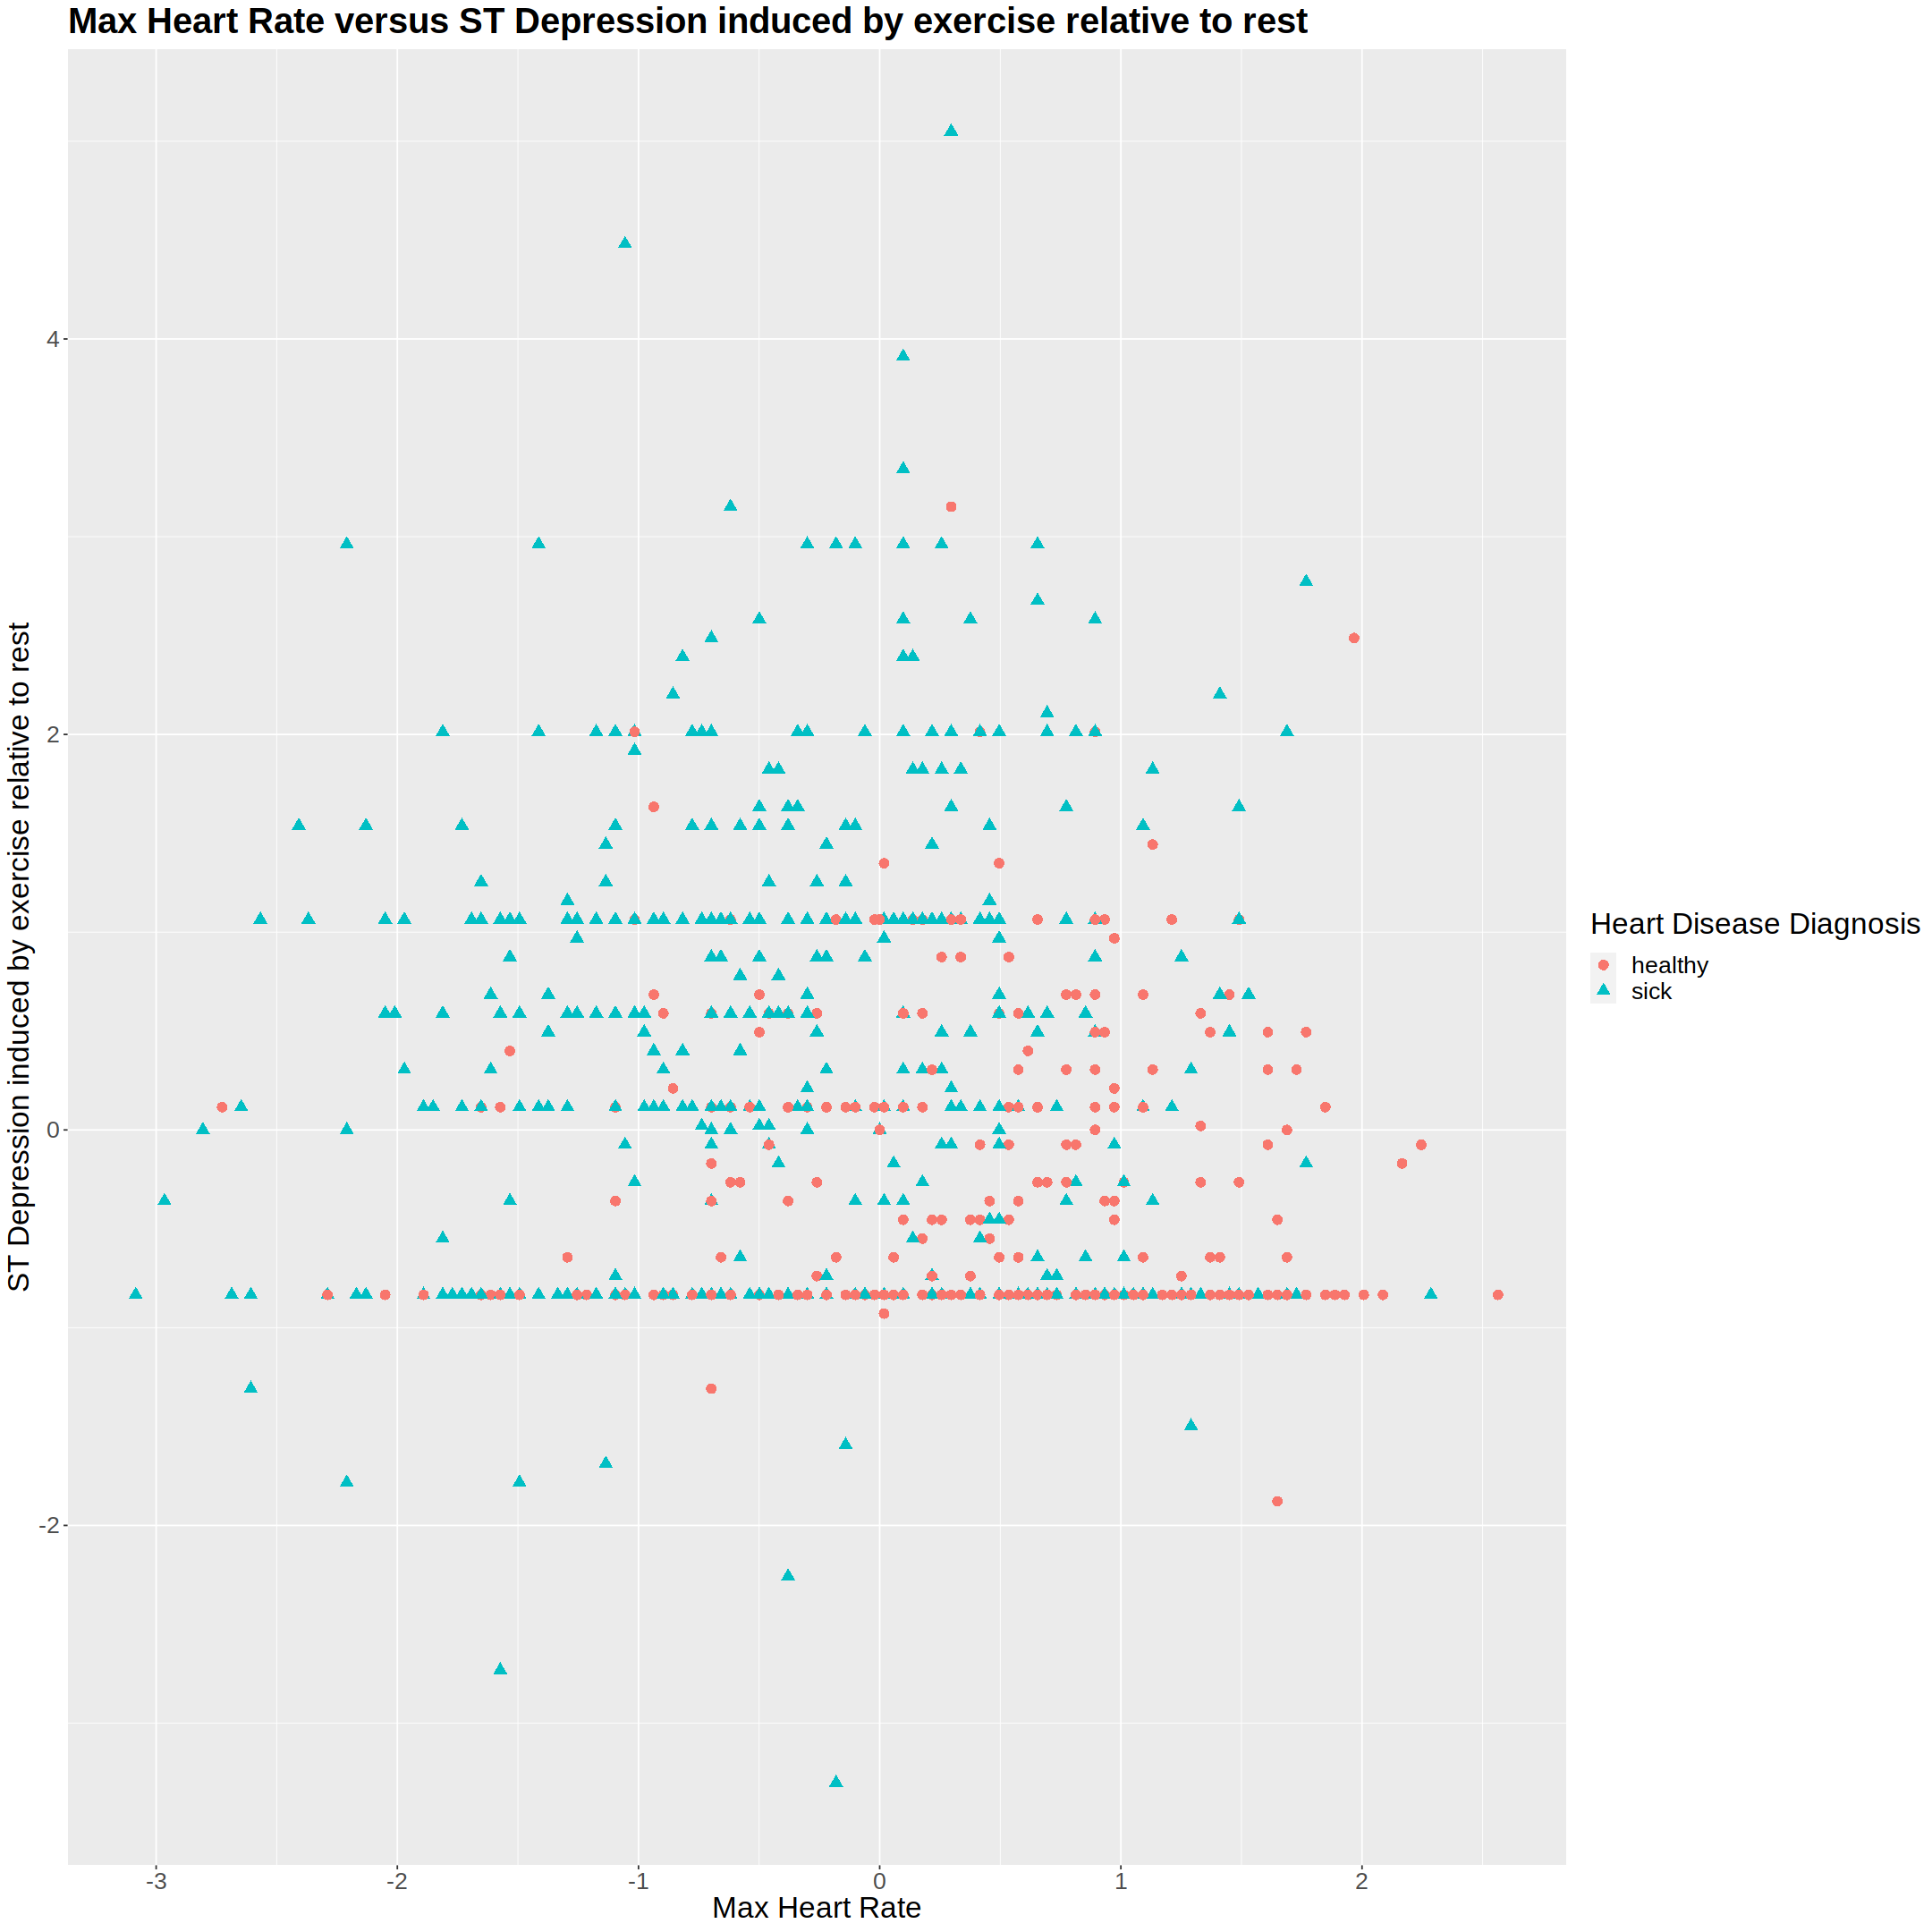

In [11]:
options(repr.plot.width = 18, repr.plot.height = 18) 

# coloured and grouped-by-shape scatterplot

# Max_heart_rate & ST_depression_induced_by_exercise_relative_to_rest
mhr_oldpeak <- imputed_and_scaled_global_dataset |> 
    ggplot(aes(x = Max_heart_rate, y = ST_depression_induced_by_exercise_relative_to_rest)) + 
    geom_point(aes(colour = Class, shape = Class), size = 3) + 
    labs(title = "Max Heart Rate versus ST Depression induced by exercise relative to rest", x = "Max Heart Rate", y = "ST Depression induced by exercise relative to rest", colour = "Heart Disease Diagnosis", shape = "Heart Disease Diagnosis") + 
    theme(text = element_text(size = 20), plot.title = element_text(face = "bold"))
mhr_oldpeak

# Justification for why we decided to use scatterplots (with all possible pairings of numerical variables) to pick our predictor variables:

# 1) We wanted to look for predictor variables from the set of numerical variables in our dataset, because we plan on using the KNN classification algorithm, 
# which is known to yield more accurate predictions when the predictor variables are numerical instead of categorical

# 2) We created scatterplots (where for each distinct value of a class, the observations with that class value have a unique colour and shape) 
# for every possible pairing of numerical variables
# because we thought that 
# by making scatterplots for each possible pairing of numerical variables 
# and comparing each of these plots to see which one shows the most apparent separation of the observations belonging to each of the distinct classes,
# we'd be able to determine the best pair of predictor variables for KNN.
# These variables would be the ones plotted on the x-axis and y-axis of the scatterplot with the clearest separation of the distinct classes.

# In our case, since we felt that the plot of "Max Heart Rate" against "ST depression induced by exercise relative to rest" was the one that did the best job at showing the separation 
# of observations classified as 'healthy' and observations classified as 'sick', we came to the conclusion that the two aformentioned variables would be the most suitable predictor variables for KNN.

# Methods #

## Explain how you will conduct either your data analysis and which variables/columns you will use. ##

K-nearest neighbors algorithm will be used to predict if a patient is healthy or sick based on their ST depression induced by exercise relative to rest and their maximum heart rate. Other variables like cholesterol and resting blood pressure were considered to be used for the classification model, but after plotting each of the variables against each other in scatterplots, it appeared that the ST depression vs maximum heart rate best clustered the data into sick and healthy groups.



## Describe at least one way that you will visualize the results ##

A scatterplot will be used to plot St depression induced by exercise relative to rest and their maximum heart rate. <br>
The points will be colored and shaped based on sick vs. healthy to make the plot easier to read/ interpret.




# Expected outcomes and significance #

## What do you expect to find? ##
This study aims to propose an accurate classification model for heart disease prediction using a machine learning classification algorithm, K-nearest neighbors, that can effectively categorize individuals based on their medical data.

## What impact could such findings have? ##
The findings of this study could have the potential to make an impact in the field of medical health since an accurate heart disease prediction model can assist intervention measures, which may lead to better patient outcomes.

## What future questions could this lead to? ##
Future questions that this could raise involve the comparability of the K-nearest neighbors classifier model to other models. <br><br> For example, <br> 1. How does the accuracy of prediction with the K-nearest neighbors approach compare with other prediction models based on different machine learning algorithms?
<br>2. What are the advantages and limitations of the K-nearest neighbors method in comparison to the other methods in the case of predicting the heart disease?